# BIKE SHARING DEMAND

__Data Fields__ <br>
__datetime__ - hourly date + timestamp <br>
__season__ -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br> 
__holiday__ - whether the day is considered a holiday <br>
__workingday__ - whether the day is neither a weekend nor holiday <br>
__weather__ - 1: Clear, Few clouds, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
__temp__ - temperature in Celsius <br>
__atemp__ - "feels like" temperature in Celsius <br>
__humidity__ - relative humidity <br>
__windspeed__ - wind speed <br>
__casual__ - number of non-registered user rentals initiated <br>
__registered__ - number of registered user rentals initiated <br>
__count__ - number of total rentals

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mtl
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
bikedf = pd.read_csv('./dataset/train.csv', sep=r',')
testdf = pd.read_csv('./dataset/test.csv', sep=r',')
bikedf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Data Exploration

<Axes: >

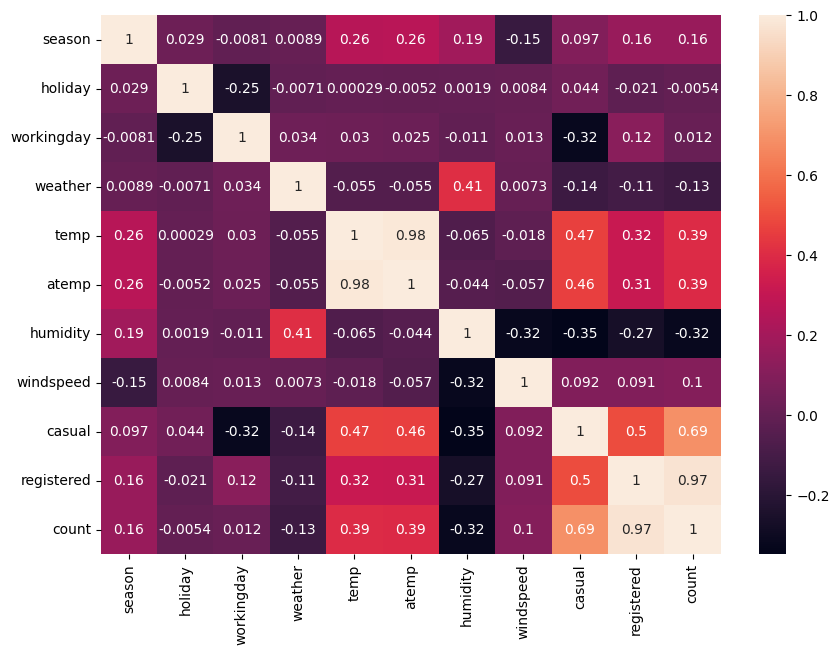

In [37]:
# correlation between numerical features
numcols = bikedf.columns.to_list()[1:]
plt.figure(figsize=(10,7))
sns.heatmap(bikedf[numcols].corr(), annot=True)
plt.plot()

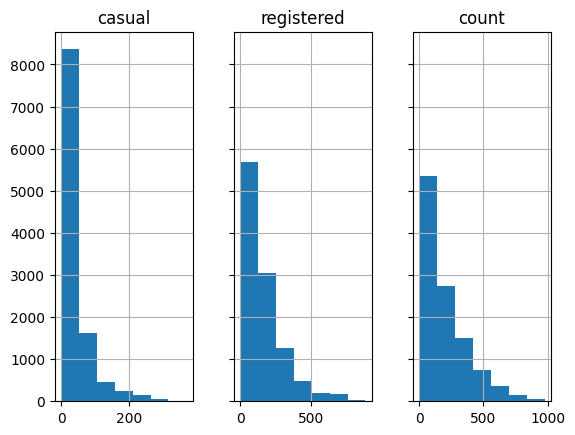

In [ ]:
# distribution of registered, casual, and count
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True)
bikedf[['casual','registered','count']].hist(ax=axs, bins=7)
plt.show()

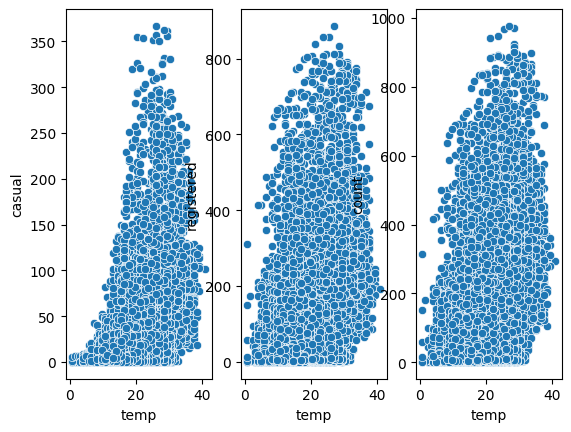

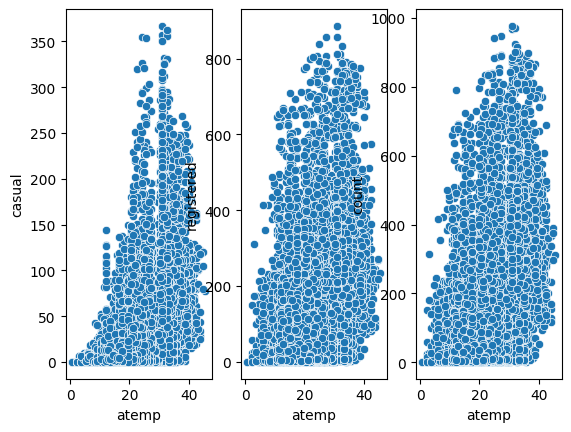

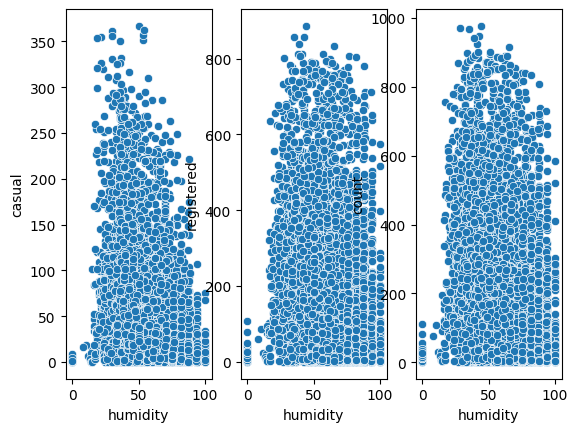

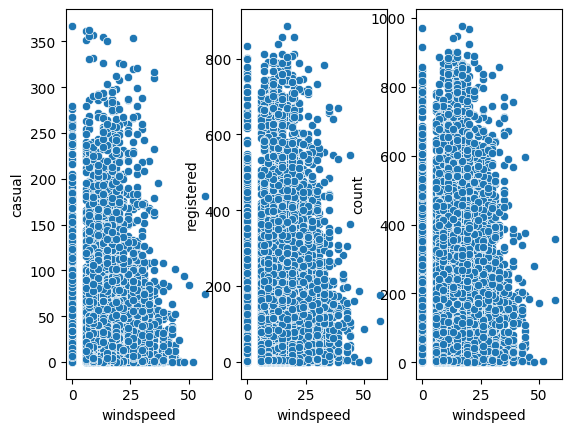

In [64]:
# scatter plot of continuous features against target features
cont_features = bikedf.columns.to_list()[5:-3]
targets = bikedf.columns.to_list()[-3:]

for feature in cont_features:
    fig, axs = plt.subplots(nrows=1, ncols=3)
    sns.scatterplot(data=bikedf, x=feature, y=targets[0], ax=axs[0])
    sns.scatterplot(data=bikedf, x=feature, y=targets[1], ax=axs[1])
    sns.scatterplot(data=bikedf, x=feature, y=targets[2], ax=axs[2])
    plt.show()

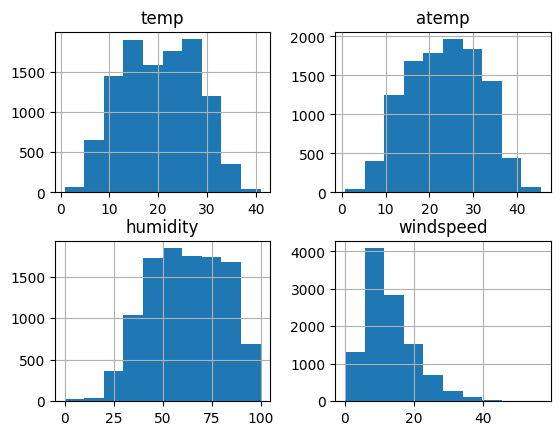

In [66]:
# histogram plot of continuous features
bikedf[cont_features].hist(bins=10)
plt.show()

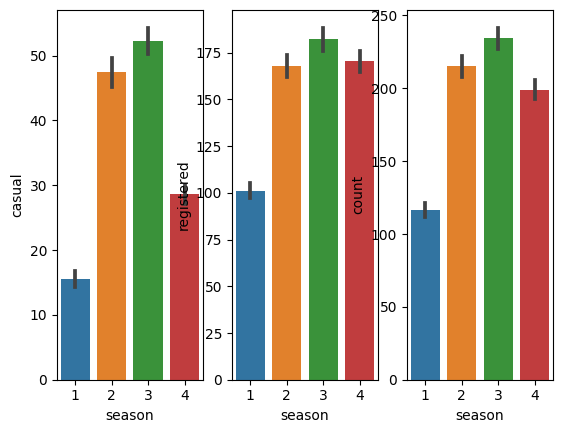

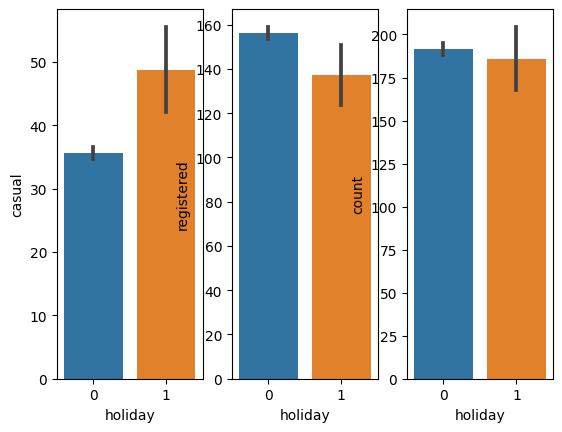

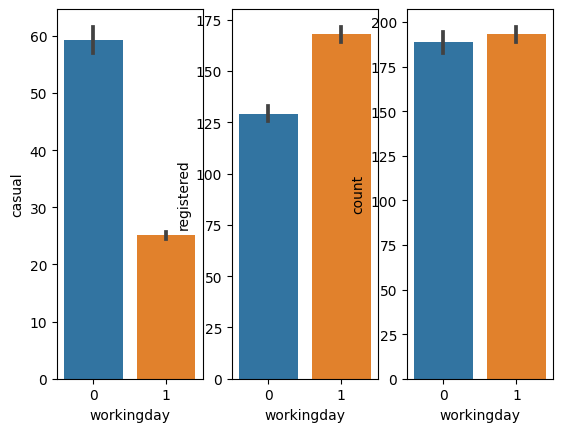

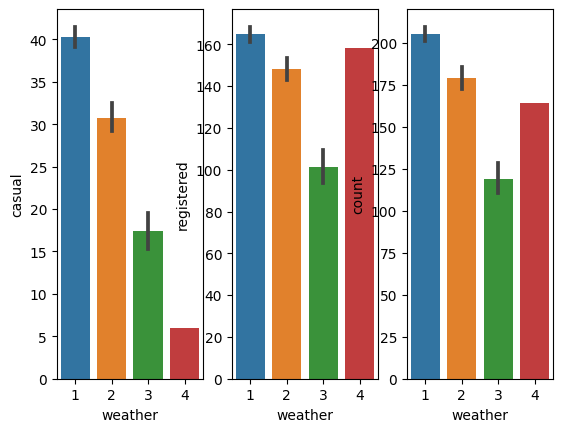

In [75]:
# bar chart of categorical features
cat_features = bikedf.columns.to_list()[1:5]

for feature in cat_features:
    fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
    sns.barplot(data=bikedf, x=feature, y=targets[0], ax=axs[0])
    sns.barplot(data=bikedf, x=feature, y=targets[1], ax=axs[1])
    sns.barplot(data=bikedf, x=feature, y=targets[2], ax=axs[2])
    plt.show()

In [71]:
# box plots of categorical features


['season', 'holiday', 'workingday', 'weather']